In [65]:
from serenata_toolbox.datasets import Datasets
import pandas as pd
import matplotlib.pyplot as plot
%matplotlib inline
import requests
path = "/home/arthurmts/workspace/beijo-de-moca/data/"

## Dados Abertos Câmara dos Deputados

Para este projeto iremos acessar a base de dados disponibilizada pelo Governo Federal afim de analisar os dados referentes aos gastos dos nossos deputados e senadores. Esta política de dados abertos foi iniciada em 2016 no governo de Dilma Roussef, com o Decreto 8.777, que instaurou a [Política de Dados Abertos do Poder Executivo federal](http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2016/decreto/D8777.htm).  

Esses dados estão disponibilizados nos portais de Dados Abertos do **Senado Federal** e da **Câmara dos Deputados**. 
 

### Escopo do trabalho

- Neste trabalho iremos usar alguns parâmetros para focar nossos esforços em dados mais proximos da realidade, trabalhando apenas com parlamentares do estado do Nordeste.  
  
  
- Dessa forma, conseguiremos visualizar melhor e encontrar informações a partir dos gastos e dos dados disponibilizados pelo projeto [serenata_de_amor](https://serenata.ai/), que também sera amplamente utilizado.

In [50]:
# Capturando os dados da API das tabelas do serenata
deputados_Nordeste_2019 = requests.get("https://dadosabertos.camara.leg.br/api/v2/deputados?siglaUf=MA&siglaUf=CE&siglaUf=PI&siglaUf=BA&siglaUf=SE&siglaUf=AL&siglaUf=PE&siglaUf=PB&siglaUf=RN&siglaUf=&ordem=ASC&ordenarPor=nome", headers={'Accept':'application/json'}).json()
deputados_Nordeste_2018 = requests.get('https://dadosabertos.camara.leg.br/api/v2/deputados?siglaUf=MA&siglaUf=CE&siglaUf=PI&siglaUf=BA&siglaUf=SE&siglaUf=AL&siglaUf=PE&siglaUf=PB&siglaUf=RN&siglaUf=&dataInicio=2018-01-01&dataFim=2018-12-31', headers= {'Accept':'application/json'}).json()
df_deputados_serenata_2018 = pd.read_csv(path+'Ano-2018.csv', sep=';')
df_deputados_serenata_2019 = pd.read_csv(path+'Ano-2019.csv', sep=';')

In [53]:
nomes_deputados_nordeste_2018 = [dep['nome'] for dep in deputados_Nordeste_2018['dados']]
nomes_deputados_nordeste_2019 = [dep['nome'] for dep in deputados_Nordeste_2019['dados']]

In [57]:
df_deputados_nordeste_2018 = df_deputados_serenata_2018[df_deputados_serenata_2018
                                                   ['txNomeParlamentar'].isin(nomes_deputados_nordeste_2018)]

df_deputados_nordeste_2019 = df_deputados_serenata_2019[df_deputados_serenata_2019
                                                   ['txNomeParlamentar'].isin(nomes_deputados_nordeste_2019)]

Soma das notas fiscais emitidas deputados nordestinos em 2018, que serão pagas pela **CEAP**

In [56]:
df_deputados_nordeste_2018['vlrLiquido'].sum()

66674902.70999999

Soma das notas fiscais emitidas deputados nordestinos em 2018, que serão pagas pela **CEAP**

In [74]:
df_deputados_nordeste_2019['vlrLiquido'].sum()

48179579.519999996

## CEAP por deputado

In [75]:
ceap_deputado_2018 = df_deputados_nordeste_2018.groupby(df_deputados_nordeste_2018['txNomeParlamentar']).sum()['vlrLiquido'].sort_values(ascending=False)

Deputados que mais gastaram no ano de 2018

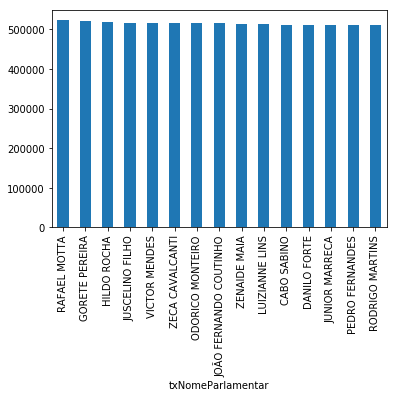

In [86]:
ceap_deputado_2018[:15].plot.bar()

Deputados que menos gastaram no ano de 2018

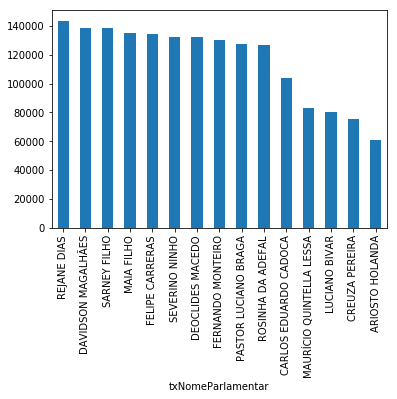

In [87]:
ceap_deputado_2018[-15:].plot.bar()

In [88]:
ceap_deputado_2019 = df_deputados_nordeste_2019.groupby(df_deputados_nordeste_2019['txNomeParlamentar']).sum()['vlrLiquido'].sort_values(ascending=False)

Deputados que mais usaram a CEPA em 2019

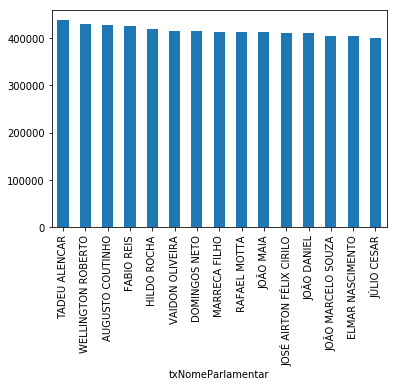

In [91]:
ceap_deputado_2019[:15].plot.bar()